# Stratification v4

In [1]:
import sys

sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap_experiment
from utils.prop_utils import prop_probs
from utils.strat_utils import calculate_grouped_effects

In [3]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [4]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

## Based on prior employment

### Experimental Data

In [5]:
stratify_cols = ["u75"]

strata_effect = calculate_grouped_effects(
    lalonde_exp,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)
print(
    f"Treatment effect by stratifying based on "
    + f"""{", ".join(stratify_cols)} are: {strata_effect:.2f}"""
)

Treatment effect by stratifying based on u75 are: 1778.15


In [6]:
strata_boostrap_results = bootstrap_experiment(
    df=lalonde_exp,
    function=calculate_grouped_effects,
    num_exp=10,
    n=50,
    ci=95,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.82it/s]


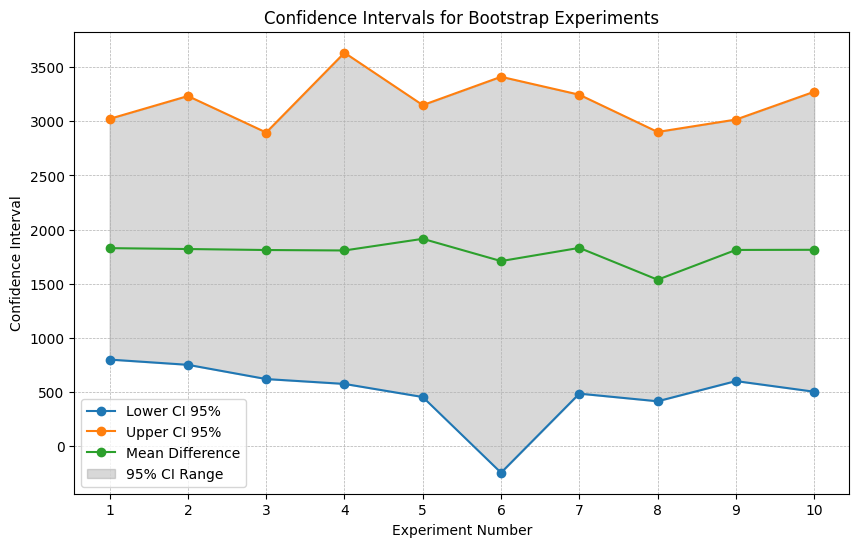

In [7]:
ci_df = pd.DataFrame(strata_boostrap_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

### Observational Data

In [8]:
stratify_cols = ["u75"]

strata_effect = calculate_grouped_effects(
    lalonde_obs,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)
print(
    f"Treatment effect by stratifying based on "
    + f"""{", ".join(stratify_cols)} are: {strata_effect:.2f}"""
)

Treatment effect by stratifying based on u75 are: 695.85


In [9]:
strata_boostrap_results = bootstrap_experiment(
    df=lalonde_obs,
    function=calculate_grouped_effects,
    num_exp=10,
    n=50,
    ci=95,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.56it/s]


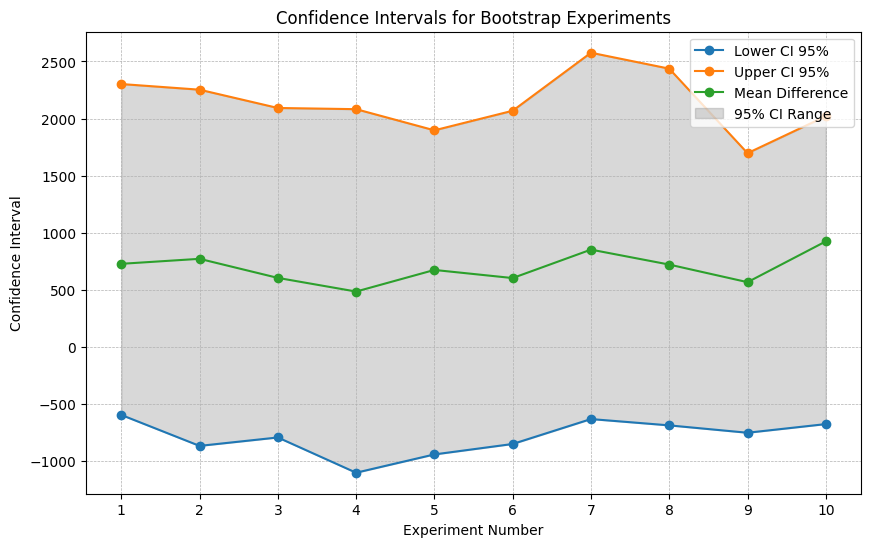

In [10]:
ci_df = pd.DataFrame(strata_boostrap_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

## Based on race and prior employment

### Experimental Data

In [11]:
stratify_cols = ["u75", "hispanic", "black"]

strata_effect = calculate_grouped_effects(
    lalonde_exp,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)
print(
    f"Treatment effect by stratifying based on "
    + f"""{", ".join(stratify_cols)} are: {strata_effect:.2f}"""
)

Treatment effect by stratifying based on u75, hispanic, black are: 1741.91


In [12]:
strata_boostrap_results = bootstrap_experiment(
    df=lalonde_exp,
    function=calculate_grouped_effects,
    num_exp=10,
    n=50,
    ci=95,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.00it/s]


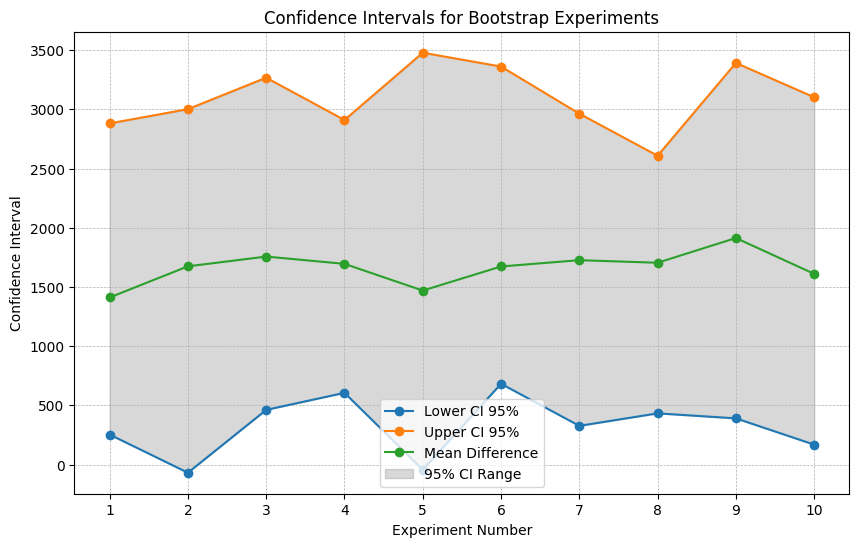

In [13]:
ci_df = pd.DataFrame(strata_boostrap_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

### Observational Data

In [14]:
stratify_cols = ["u75", "hispanic", "black"]

strata_effect = calculate_grouped_effects(
    lalonde_obs,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)
print(
    f"Treatment effect by stratifying based on "
    + f"""{", ".join(stratify_cols)} are: {strata_effect:.2f}"""
)

Treatment effect by stratifying based on u75, hispanic, black are: 793.78


In [15]:
strata_boostrap_results = bootstrap_experiment(
    df=lalonde_obs,
    function=calculate_grouped_effects,
    num_exp=10,
    n=50,
    ci=95,
    stratify_cols=stratify_cols,
    treatment_col="treat",
    outcome_col="re78_re75",
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.18it/s]


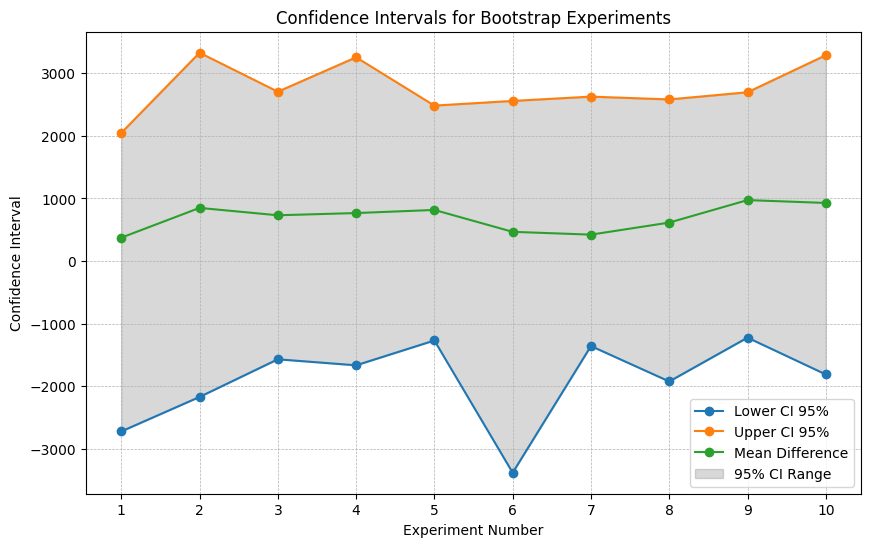

In [16]:
ci_df = pd.DataFrame(strata_boostrap_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()